<a href="https://colab.research.google.com/github/ryrahman-arch/NGG_6050/blob/main/Rahman_Multiple_Comparisons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# get our toolboxes
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Exercise: simulate 1000 t-tests and save the p-values between two samples each
# with the same mean and std

# define our variables
sample1_mean = 10
sample2_mean = 10
sample1_std = 1
sample2_std = 1

# Array to store the p-values
p_values = []

# Loop to perform the t-test 1000 times
for _ in range(1000):
    # Generate random samples from normal distributions
    sample1 = stats.norm.rvs(sample1_mean, sample1_std, size=1000)
    sample2 = stats.norm.rvs(sample2_mean, sample2_std, size=1000)

    # Perform the t-test and extract the p-value
    t_stat, p_value = stats.ttest_ind(sample1, sample2)
    p_values.append(p_value)

# p_values now contains 1000 p-values
print(p_values)



[0.07171282405338673, 0.7581150607238262, 0.16583792455300095, 0.9607453411167124, 0.5968354419907249, 0.7948416418294939, 0.49067676056818355, 0.7741883660595776, 0.7477219140466642, 0.4530238676671873, 0.5586007471050183, 0.5279068582031132, 0.1199319953207905, 0.1855991658385589, 0.3967076488418917, 0.8986736626057904, 0.5151156787378712, 0.6822617636498503, 0.05717754233087289, 0.7019738661741886, 0.8364367607697363, 0.6165756222863791, 0.011905375051774778, 0.0068025389418215985, 0.7217250832410294, 0.8698971482408355, 0.2310099254295808, 0.9664426399028367, 0.22959440848344387, 0.9001152865741286, 0.27988778866680253, 0.6848571648934717, 0.2763983898220841, 0.16039030909654803, 0.019511823571646138, 0.8397848224694591, 0.7809159308734656, 0.2037031538716652, 0.8666741319637468, 0.18899765637912802, 0.13789022058926695, 0.0011370976895267325, 0.6404030092701499, 0.7105230540755441, 0.18362959858572245, 0.6008573087706748, 0.9469066728587054, 0.08377404928058492, 0.5989591076563758

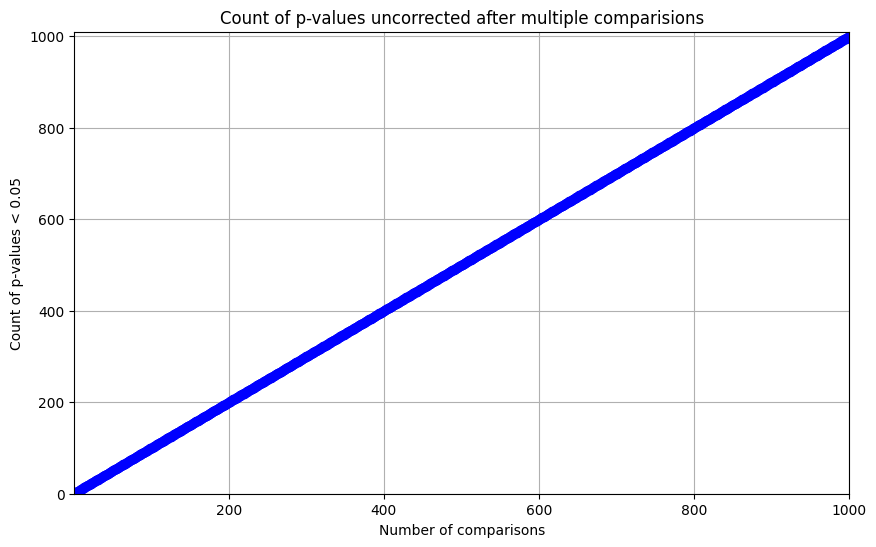

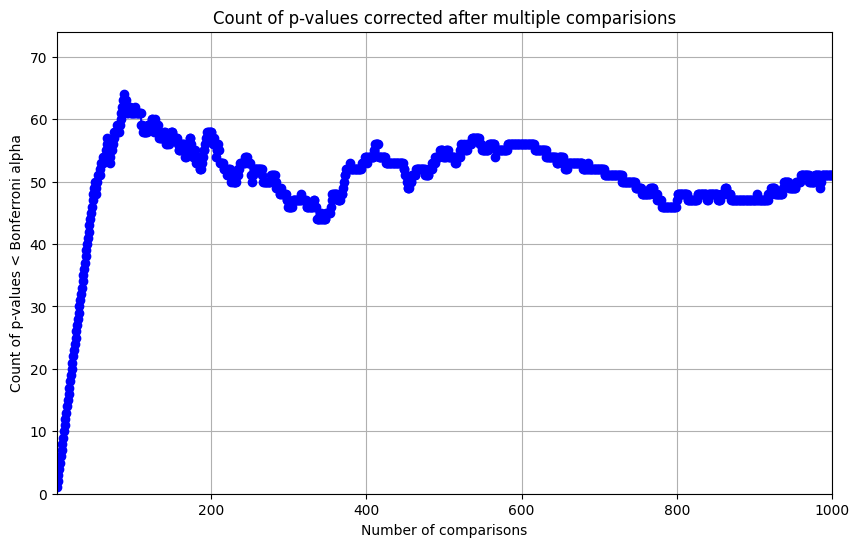

In [23]:
# Correct the multiple comparisons error with Bonferroni inequalities

# define our variables
sample1_mean = 10
sample2_mean = 10
sample1_std = 1
sample2_std = 1
initial_alpha = 0.05

# array to store p-values
p_values = []

# loop to perform the t-test 1000 times
for _ in range(1000):
  # generate random samples from normal distributions
  sample1 = stats.norm.rvs(sample1_mean, sample1_std, size=1000)
  sample2 = stats.norm.rvs(sample2_mean, sample2_std, size=1000)

  # Perform the t-test and extract p-values
  t_stat, p_value = stats.ttest_ind(sample1, sample2)
  p_values.append(p_value/1000)

# p_values now contains 1000 p-values so now we can do Bonferroni correction and
# divide each alpha by N and count the p-values that are less than the corrected
# and uncorrected alphas and plot this to compare them
new_alphas = [initial_alpha / (n + 1) for n in range(1000)]

# Count how many p-values are less than the uncorrected and corrected alphas
# at each position
uncorrected_counts = [np.sum(np.array(p_values[:n + 1]) < initial_alpha) for n in range(1000)]
corrected_counts = [np.sum(np.array(p_values[:n + 1]) < new_alphas[n]) for n in range(1000)]

# Plotting the uncorrected counts as a function of n
plt.figure(figsize=(10, 6))
plt.plot(range(1, 1001), uncorrected_counts, marker='o', linestyle='-', color='b')
plt.title('Count of p-values uncorrected after multiple comparisions')
plt.xlabel('Number of comparisons')
plt.ylabel('Count of p-values < 0.05')
plt.grid()
plt.xlim(1, 1000)
plt.ylim(0, max(uncorrected_counts) + 10)
plt.show()

# Plotting the corrected counts as a function of n
plt.figure(figsize=(10, 6))
plt.plot(range(1, 1001), corrected_counts, marker='o', linestyle='-', color='b')
plt.title('Count of p-values Bonferroni corrected after multiple comparisions')
plt.xlabel('Number of comparisons')
plt.ylabel('Count of p-values < Bonferroni alpha')
plt.grid()
plt.xlim(1, 1000)
plt.ylim(0, max(corrected_counts) + 10)
plt.show()


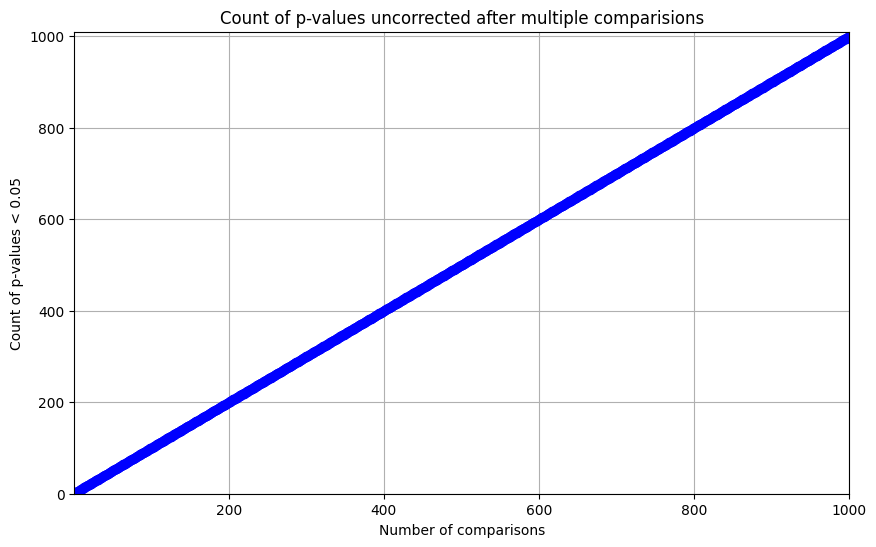

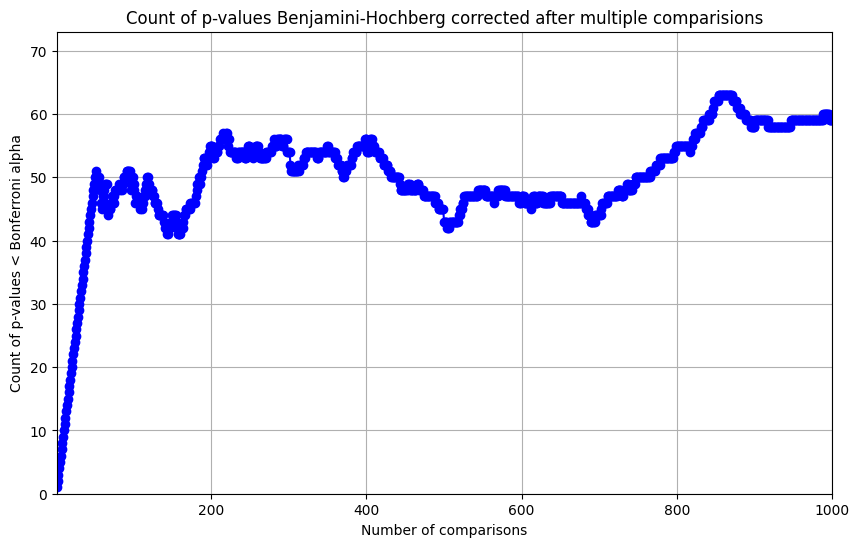

In [29]:
# Correct the multiple comparisons error with Benjamini-Hochberg procedure

# define our variables
sample1_mean = 10
sample2_mean = 10
sample1_std = 1
sample2_std = 1
initial_alpha = 0.05

# Set the number of p-values and the false discovery rate
n = 1000
q = 0.05

# array to store p-values
p_values = []

# loop to perform the t-test 1000 times
for _ in range(1000):
  # generate random samples from normal distributions
  sample1 = stats.norm.rvs(sample1_mean, sample1_std, size=1000)
  sample2 = stats.norm.rvs(sample2_mean, sample2_std, size=1000)

  # Perform the t-test and extract p-values
  t_stat, p_value = stats.ttest_ind(sample1, sample2)
  p_values.append(p_value/1000)

# Convert p_values to a NumPy array
p_values = np.array(p_values)

# Rank the p-values in ascending order
ranked_indices = np.argsort(p_values)
ranked_p_values = p_values[ranked_indices]

# Calculate critical values
critical_values = [(i + 1) / n * q for i in range(n)]

# Find the largest p-value that is smaller than its associated critical value
new_alpha = None
for i in range(n):
    if ranked_p_values[i] < critical_values[i]:
        new_alpha = ranked_p_values[i]

# Count how many p-values are less than the uncorrected and corrected alphas
# at each position
uncorrected_counts = [np.sum(np.array(p_values[:n + 1]) < initial_alpha) for n in range(1000)]
corrected_counts = [np.sum(np.array(p_values[:n + 1]) < new_alphas[n]) for n in range(1000)]

# Plotting the uncorrected counts as a function of n
plt.figure(figsize=(10, 6))
plt.plot(range(1, 1001), uncorrected_counts, marker='o', linestyle='-', color='b')
plt.title('Count of p-values uncorrected after multiple comparisions')
plt.xlabel('Number of comparisons')
plt.ylabel('Count of p-values < 0.05')
plt.grid()
plt.xlim(1, 1000)
plt.ylim(0, max(uncorrected_counts) + 10)
plt.show()

# Plotting the corrected counts as a function of n
plt.figure(figsize=(10, 6))
plt.plot(range(1, 1001), corrected_counts, marker='o', linestyle='-', color='b')
plt.title('Count of p-values Benjamini-Hochberg corrected after multiple comparisions')
plt.xlabel('Number of comparisons')
plt.ylabel('Count of p-values < Benjamini-Hochberg alpha')
plt.grid()
plt.xlim(1, 1000)
plt.ylim(0, max(corrected_counts) + 10)
plt.show()


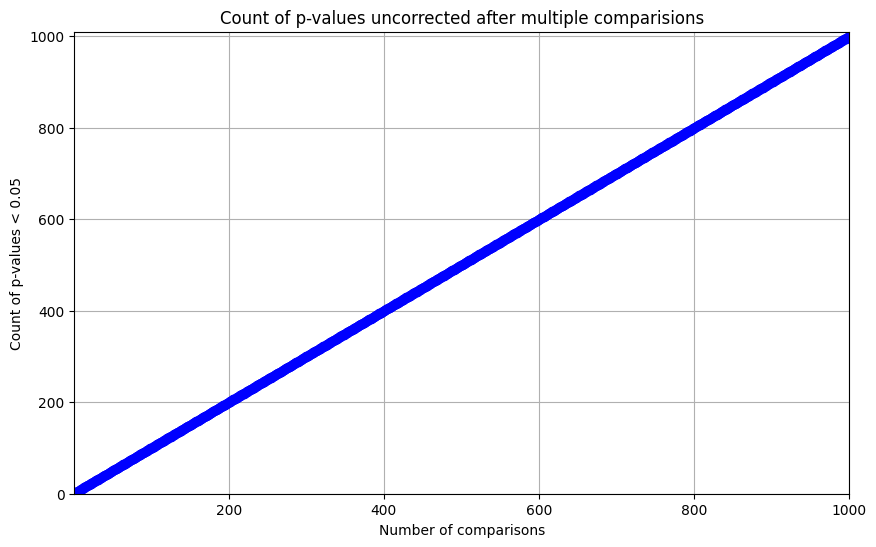

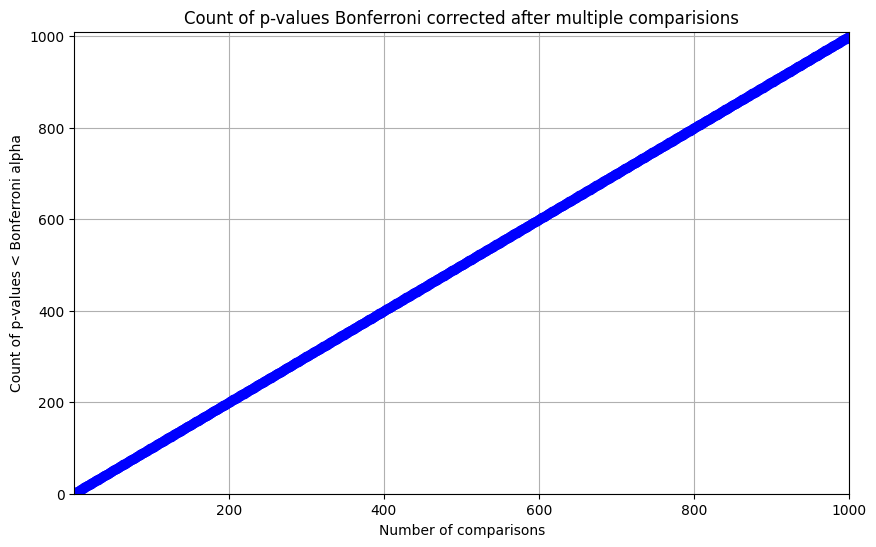

In [3]:
# Correct the multiple comparisons error with Bonferroni inequalities but change
# the means

# define our variables
sample1_mean = 1
sample2_mean = 2
sample1_std = 1
sample2_std = 1
initial_alpha = 0.05

# array to store p-values
p_values = []

# loop to perform the t-test 1000 times
for _ in range(1000):
  # generate random samples from normal distributions
  sample1 = stats.norm.rvs(sample1_mean, sample1_std, size=1000)
  sample2 = stats.norm.rvs(sample2_mean, sample2_std, size=1000)

  # Perform the t-test and extract p-values
  t_stat, p_value = stats.ttest_ind(sample1, sample2)
  p_values.append(p_value/1000)

# p_values now contains 1000 p-values so now we can do Bonferroni correction and
# divide each alpha by N and count the p-values that are less than the corrected
# and uncorrected alphas and plot this to compare them
new_alphas = [initial_alpha / (n + 1) for n in range(1000)]

# Count how many p-values are less than the uncorrected and corrected alphas
# at each position
uncorrected_counts = [np.sum(np.array(p_values[:n + 1]) < initial_alpha) for n in range(1000)]
corrected_counts = [np.sum(np.array(p_values[:n + 1]) < new_alphas[n]) for n in range(1000)]

# Plotting the uncorrected counts as a function of n
plt.figure(figsize=(10, 6))
plt.plot(range(1, 1001), uncorrected_counts, marker='o', linestyle='-', color='b')
plt.title('Count of p-values uncorrected after multiple comparisions')
plt.xlabel('Number of comparisons')
plt.ylabel('Count of p-values < 0.05')
plt.grid()
plt.xlim(1, 1000)
plt.ylim(0, max(uncorrected_counts) + 10)
plt.show()

# Plotting the corrected counts as a function of n
plt.figure(figsize=(10, 6))
plt.plot(range(1, 1001), corrected_counts, marker='o', linestyle='-', color='b')
plt.title('Count of p-values Bonferroni corrected after multiple comparisions')
plt.xlabel('Number of comparisons')
plt.ylabel('Count of p-values < Bonferroni alpha')
plt.grid()
plt.xlim(1, 1000)
plt.ylim(0, max(corrected_counts) + 10)
plt.show()



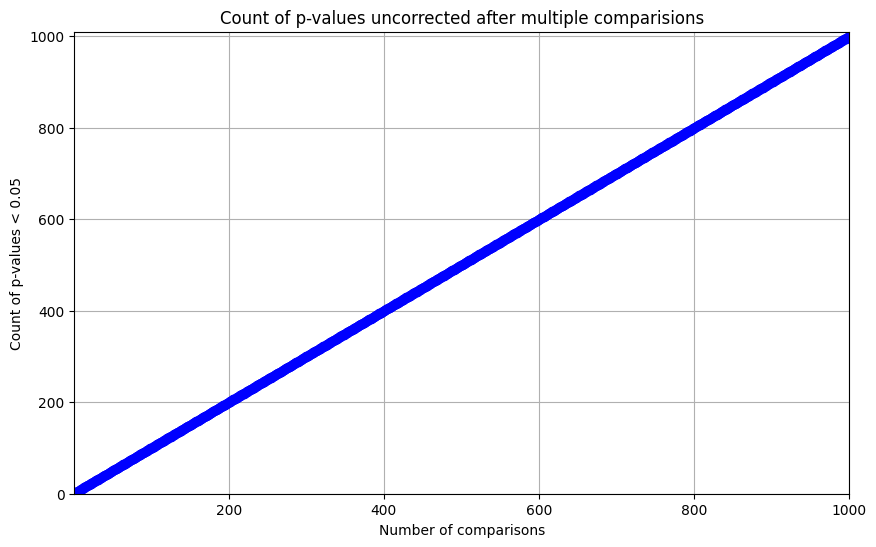

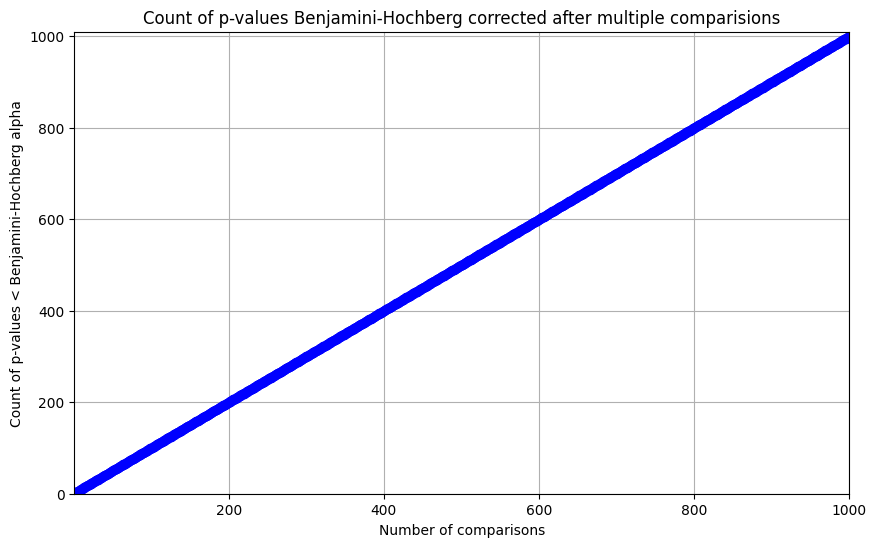

In [4]:
# Correct the multiple comparisons error with Benjamini-Hochberg procedure but
# change the means

# define our variables
sample1_mean = 1
sample2_mean = 10
sample1_std = 1
sample2_std = 1
initial_alpha = 0.05

# Set the number of p-values and the false discovery rate
n = 1000
q = 0.05

# array to store p-values
p_values = []

# loop to perform the t-test 1000 times
for _ in range(1000):
  # generate random samples from normal distributions
  sample1 = stats.norm.rvs(sample1_mean, sample1_std, size=1000)
  sample2 = stats.norm.rvs(sample2_mean, sample2_std, size=1000)

  # Perform the t-test and extract p-values
  t_stat, p_value = stats.ttest_ind(sample1, sample2)
  p_values.append(p_value/1000)

# Convert p_values to a NumPy array
p_values = np.array(p_values)

# Rank the p-values in ascending order
ranked_indices = np.argsort(p_values)
ranked_p_values = p_values[ranked_indices]

# Calculate critical values
critical_values = [(i + 1) / n * q for i in range(n)]

# Find the largest p-value that is smaller than its associated critical value
new_alpha = None
for i in range(n):
    if ranked_p_values[i] < critical_values[i]:
        new_alpha = ranked_p_values[i]

# Count how many p-values are less than the uncorrected and corrected alphas
# at each position
uncorrected_counts = [np.sum(np.array(p_values[:n + 1]) < initial_alpha) for n in range(1000)]
corrected_counts = [np.sum(np.array(p_values[:n + 1]) < new_alphas[n]) for n in range(1000)]

# Plotting the uncorrected counts as a function of n
plt.figure(figsize=(10, 6))
plt.plot(range(1, 1001), uncorrected_counts, marker='o', linestyle='-', color='b')
plt.title('Count of p-values uncorrected after multiple comparisions')
plt.xlabel('Number of comparisons')
plt.ylabel('Count of p-values < 0.05')
plt.grid()
plt.xlim(1, 1000)
plt.ylim(0, max(uncorrected_counts) + 10)
plt.show()

# Plotting the corrected counts as a function of n
plt.figure(figsize=(10, 6))
plt.plot(range(1, 1001), corrected_counts, marker='o', linestyle='-', color='b')
plt.title('Count of p-values Benjamini-Hochberg corrected after multiple comparisions')
plt.xlabel('Number of comparisons')
plt.ylabel('Count of p-values < Benjamini-Hochberg alpha')
plt.grid()
plt.xlim(1, 1000)
plt.ylim(0, max(corrected_counts) + 10)
plt.show()